In [ ]:
#参考：https://irukanobox.blogspot.com/2021/11/python.html

In [ ]:
!pip3 install wbgapi

In [1]:
#from Country_population.models import Population
import matplotlib
#バックエンド指定
#matplotlib.use('Agg')
import matplotlib
import matplotlib.pyplot as plt
import io
from django.http import HttpResponse

/opt/anaconda3/lib/python3.8/site-packages/wbgapi/data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


<AxesSubplot:>

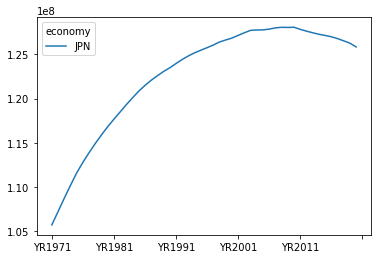

In [3]:
import wbgapi as wb
df_pop = wb.data.DataFrame(['SP.POP.TOTL'], 'JPN', mrv=50).T
df_pop.plot()

In [5]:
df_pop.head()

economy,JPN
YR1971,105697000.0
YR1972,107188000.0
YR1973,108707000.0
YR1974,110162000.0
YR1975,111573000.0


In [21]:
year_list = df_pop.index.tolist()
year_list = [x[2:] for x in year_list]

In [22]:
pop_list = df_pop['JPN'].tolist()

In [35]:
import japanize_matplotlib
import numpy as np

Text(0, 0.5, '人口')

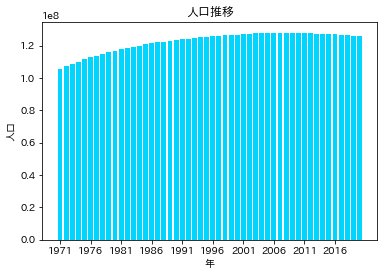

In [40]:
x = year_list
y = pop_list 
plt.bar(x, y, color='#00d5ff')
plt.title(r"人口推移", color='#000000')
plt.xticks(np.arange(0, 50, 5))
plt.xlabel("年")
plt.ylabel("人口")

In [42]:
def plot_pop_creat():
    #ここを関数化したい
    x = year_list
    y = pop_list 
    plt.bar(x, y, color='#00d5ff')
    plt.title(r"人口推移", color='#000000')
    plt.xticks(np.arange(0, 50, 5))
    plt.xlabel("年")
    plt.ylabel("人口")
    return plt

In [43]:
#SVG化
def plot_con_svg(plt):
    buf = io.BytesIO()
    plt.savefig(buf, format='svg', bbox_inches='tight')
    s = buf.getvalue()
    buf.close()
    return s

In [44]:
# 実行するビュー関数
def get_svg(request):
    plt = setPlt()  
    svg = plt2svg(plt)  #SVG化
    plt.cla()  # グラフをリセット
    response = HttpResponse(svg, content_type='image/svg+xml')
    return response

In [36]:
np.arange(0, 50, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [ ]:
#グラフ作成
def setPlt():
    x = ["07/01", "07/02", "07/03", "07/04", "07/05", "07/06", "07/07"]
    y = [3, 5, 0, 5, 6, 10, 2]
    plt.bar(x, y, color='#00d5ff')
    plt.title(r"$\bf{Running Trend  -2020/07/07}$", color='#3407ba')
    plt.xlabel("Date")
    plt.ylabel("km")
    

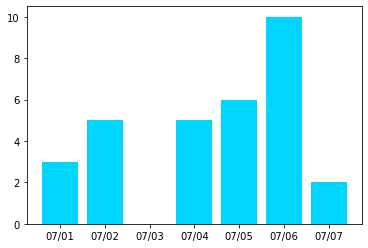

In [2]:
x = ["07/01", "07/02", "07/03", "07/04", "07/05", "07/06", "07/07"]
y = [3, 5, 0, 5, 6, 10, 2]
plt.bar(x, y, color='#00d5ff')
plt.show()

In [ ]:
# SVG化
def plt2svg():
    buf = io.BytesIO()
    plt.savefig(buf, format='svg', bbox_inches='tight')
    s = buf.getvalue()
    buf.close()
    return s

In [ ]:
setPlt() 

In [ ]:
# 実行するビュー関数
def get_svg(request):
    setPlt()  
    svg = plt2svg()  #SVG化
    plt.cla()  # グラフをリセット
    response = HttpResponse(svg, content_type='image/svg+xml')
    return response

In [ ]:
import wbgapi as wb
 
display(wb.series.info(q='power'))

In [ ]:
import wbgapi as wb
 
display(wb.region.info())

In [ ]:
import wbgapi as wb
 
display(wb.economy.info())

In [ ]:
#データを取得するときにはデータの種類、国または地域、年を指定できる。以下では2019年のアメリカの人口を取得できる。
import wbgapi as wb
 
display(wb.data.DataFrame(['SP.POP.TOTL'], ['USA'], [2019]))

In [ ]:
#日本の人口データを1960年〜2020年で取得してくる
SP.POP.TOTL?end=2020&locations=JP&start=1960

In [ ]:
#データを取得するときにはデータの種類、国または地域、年を指定できる。以下では2019年のアメリカの人口を取得できる。
import wbgapi as wb
 
display(wb.data.DataFrame(['SP.POP.TOTL'], ['JPN'], [2019]))

In [ ]:
class User(models.Model):
    name = models.CharField(max_length=50)

In [ ]:
# 10万件のUserオブジェクトが入ったリストを作る（この段階ではDBに登録されない）
user_objects = []
for _ in range(100000):
    user_objects.append(User(name="jobs"))

# user_objects のデータをDBに一括登録する
User.objects.bulk_create(user_objects)

In [ ]:
for _ in range(100000):

In [ ]:
import wbgapi as wb
df_pop = wb.data.DataFrame(['SP.POP.TOTL'], 'JPN', mrv=50).T
df_pop.head()

In [ ]:
for item in df_pop.index:
    print(item[2:])
    print(df_pop.at[item,'JPN'])

In [ ]:
wb.data.DataFrame(['SP.POP.TOTL'], 'JPN', mrv=50).T

In [ ]:
wb.data.DataFrame(['SP.POP.TOTL'], ['JPN'], [2019])

In [ ]:
help(wb)  
help(wb.series)  
[etc]

In [ ]:
%matplotlib inline
 
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
 
# 地域を除いた国のリストを作成
# regionが空白になっていないidのみにする 
economy_info = wb.economy.info().items
countries = [ei['id'] for ei in economy_info if ei['region'] != '']
 
# 2019年の国別の以下のデータを取得する
# SP.POP.TOTL: 人口
# NY.GDP.PCAP.CD: ひとりあたりGDP
# SP.DYN.LE00.IN: 出生時平均寿命
# BN.GSR.FCTY.CD: 一次純所得
df=wb.data.DataFrame(
    ['SP.POP.TOTL', 'NY.GDP.PCAP.CD', 'SP.DYN.LE00.IN', 'BN.GSR.FCTY.CD'],
    countries,
    [2019]
)
 
# データがない国を省いて人口上位50にしぼる
df = df.dropna().sort_values('SP.POP.TOTL', ascending=False).head(50)
 
plt.figure(figsize=(18, 12))
 
# バブルチャート作成
# NY.GDP.PCAP.CD: Y軸
# SP.DYN.LE00.IN: X軸
# SP.POP.TOTL: 円の大きさ
# BN.GSR.FCTY.CD: 色
ax = sns.scatterplot(
    data=df, 
    x='NY.GDP.PCAP.CD', 
    y='SP.DYN.LE00.IN', 
    size='SP.POP.TOTL', 
    c=df['BN.GSR.FCTY.CD'], 
    cmap='autumn_r', 
    alpha=0.9, 
    edgecolors='grey', 
    linewidth=1, 
    legend=False, 
    sizes=(20, 5000)
)
 
# 各円に国IDを表示する
def put_label(x, y, labels, ax):
    a = pd.concat({'x': x, 'y': y, 'label': labels}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['label']))
 
put_label(df['NY.GDP.PCAP.CD'], df['SP.DYN.LE00.IN'], df.index.to_series(), plt.gca())
 
plt.show()